# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

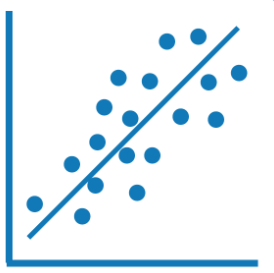

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [61]:
#solution
from sklearn import datasets
import pandas as pd
bostan = datasets.load_boston()
bostan.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [31]:
#solution
from sklearn.datasets import load_boston
import pandas as pd

In [33]:
 boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [34]:
df = pd.DataFrame(boston.data)
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [35]:
df = pd.DataFrame(boston.target)
df.head()

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [36]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [37]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [38]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [39]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


<AxesSubplot:>

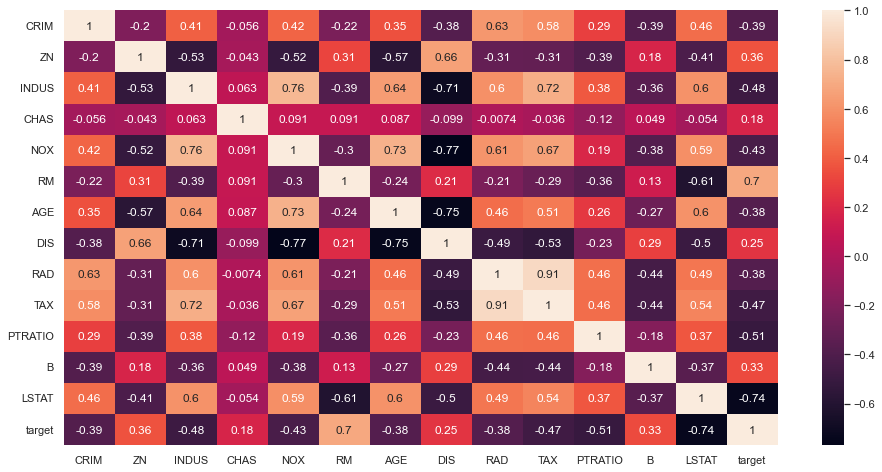

In [40]:
#Solution
#creating correlation between diffeerent feature and tergat

import seaborn as sns

#edit size of the heatmap
sns.set(rc = {'figure.figsize': (16,8)})
sns.heatmap(df.corr(), annot=True)


In [41]:
#create feature X
import numpy as np

#X = np.array(df.RM).reshape(-1,1) using numpy array
X= df[['RM']]
y = df.target
X

RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]

In [42]:
#To create linear model
from sklearn.linear_model import LinearRegression
#to create linear regression model
lr = LinearRegression()#lr is the model


#Train model using fit method
lr.fit(X,y)


LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [43]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
lr.coef_



array([9.10210898])

In [44]:
#use intercept_ attributes to get the bias value

lr.intercept_


-34.67062077643857

In [45]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [46]:
#finding error by taking x as RM
y_hat = lr.coef_ * df.RM[0] +lr.intercept_
y_hat-df.target[0]

array([1.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [47]:
#creating y_pred

from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X)
MSE = mean_squared_error(y_pred, y)#when y_pred and y is same then MSE is zero
MSE#it will be best mean square from taking only one feature 

43.60055177116956

## <font color = blue>5. Make Predictions


In [48]:
#Use predict method to make prediction to unseen data

x_sample = [[6]]
lr.predict(x_sample)

C:\Users\Lab-2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [49]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [50]:

#X = np.array(df.RM).reshape(-1,1) using numpy array
x_df = df[['LSTAT', 'INDUS','RM']]
x_df

LSTAT  INDUS     RM
0     4.98   2.31  6.575
1     9.14   7.07  6.421
2     4.03   7.07  7.185
3     2.94   2.18  6.998
4     5.33   2.18  7.147
..     ...    ...    ...
501   9.67  11.93  6.593
502   9.08  11.93  6.120
503   5.64  11.93  6.976
504   6.48  11.93  6.794
505   7.88  11.93  6.030

[506 rows x 3 columns]

In [51]:
mlr = LinearRegression()#lr is the model


#Train model using fit method
mlr.fit(x_df,y)


LinearRegression()

In [52]:
mlr.coef_

array([-0.60671351, -0.06363554,  5.07379366])

In [53]:
mlr.intercept_


-0.9686524884038974

In [54]:
y_hat = mlr.coef_ * df.RM[0] +mlr.intercept_
y_hat-df.target[0]

array([-28.95779379, -25.38705617,   8.39154083])

In [55]:
#y prediction
y_pred = mlr.predict(x_df)
MSE = mean_squared_error(y_pred, y)#when y_pred and y is same then MSE is zero
MSE

30.39173978361495

## <font color = blue>7. Make Prediction for Multi linear Model


In [56]:
#Solution
RM = 7
LSTAT = 5
INDUS = 7

x_val = [[RM, LSTAT, INDUS]]
mlr.predict(x_val)

C:\Users\Lab-2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.98273089])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [63]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mdf = scaler.fit_transform(df)
s1 = pd.DataFrame(mdf, columns = df.columns)
s1.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503

In [66]:
x_ndf = s1[['LSTAT', 'INDUS','B','RM']]
y_ndf = s1.target
x_ndf

LSTAT     INDUS         B        RM
0   -1.075562 -1.287909  0.441052  0.413672
1   -0.492439 -0.593381  0.441052  0.194274
2   -1.208727 -0.593381  0.396427  1.282714
3   -1.361517 -1.306878  0.416163  1.016303
4   -1.026501 -1.306878  0.441052  1.228577
..        ...       ...       ...       ...
501 -0.418147  0.115738  0.387217  0.439316
502 -0.500850  0.115738  0.441052 -0.234548
503 -0.983048  0.115738  0.441052  0.984960
504 -0.865302  0.115738  0.403225  0.725672
505 -0.669058  0.115738  0.441052 -0.362767

[506 rows x 4 columns]

In [67]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()#lr is the model


#Train model using fit method
slr.fit(x_ndf,y_ndf)


LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error
y_prediction = slr.predict(x_ndf)
MSE1 = mean_squared_error(y_prediction, y_ndf)
MSE1


0.3491427664500797

In [69]:
MSE

30.39173978361495

In [70]:
MSE1

0.3491427664500797

### Therefore, the MSE reduces when the features are scaled.(MSE1 < MSE)